# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
X = data[['Age', 'Gender', 'BMI', 'SBP', 'DBP', 'FPG', 'Chol', 'Tri', 'HDL', 'LDL', 'ALT', 'BUN', 'CCR', 'FFPG', 'smoking', 'drinking', 'family_histroy']]
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

model_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm='SAMME', random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
print('Accuracy AdaBoost:', accuracy_score(y_test, y_pred_ada))

Accuracy AdaBoost: 0.9186991869918699


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print('Accuracy Gradient Boosting:', accuracy_score(y_test, y_pred_gb))

Accuracy Gradient Boosting: 0.9442508710801394


In [64]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8, reg_alpha=0.1, reg_lambda=1, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print('Accuracy XGBoost:', accuracy_score(y_test, y_pred_xgb))

Accuracy XGBoost: 0.9454123112659698


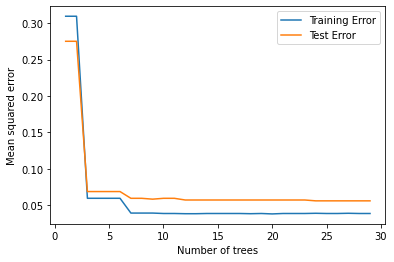

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []

for i in range(1, 30):
    model_gb = GradientBoostingClassifier(n_estimators=i, learning_rate=0.1)
    model_gb.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model_gb.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model_gb.predict(X_test)))

plt.plot(range(1, 30), train_errors, label='Training Error')
plt.plot(range(1, 30), test_errors, label='Test Error')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Mean squared error')
plt.show()

## Hypertunning

### step 1

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


#### test accuracy

In [67]:
model_xgb_reg = XGBClassifier(
    n_estimators=150, 
    learning_rate=0.01, 
    max_depth=3, 
    reg_alpha=0.1,  # L1
    reg_lambda=1.0,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.943089430894309


### step 2

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [125, 150, 200, 250],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.005, 0.01, 0.05]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


### step 3

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [125, 130, 190, 200, 210],
    'max_depth': [3, 10],
    'learning_rate': [0.01, 0.02, 0.04]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 190}


### step 4

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [180, 185, 190, 195],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.009, 0.01, 0.011, 0.012]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'learning_rate': 0.009, 'max_depth': 4, 'n_estimators': 180}


#### test


In [71]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=34, 
    reg_alpha=0.1,  # L1
    reg_lambda=1.0,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.943089430894309


### L1 and L2

In [72]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=4, 
    reg_alpha=0.2,  # L1
    reg_lambda=2.0,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.9419279907084785


In [73]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=4, 
    reg_alpha=0.5,  # L1
    reg_lambda=1.5,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.943089430894309


In [74]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=4, 
    reg_alpha=0.1,  # L1
    reg_lambda=1.5,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.943089430894309


In [75]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=4, 
    reg_alpha=0.1,  # L1
    reg_lambda=1.3,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.943089430894309


In [76]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=4, 
    reg_alpha=0.1,  # L1
    reg_lambda=5,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.9419279907084785


In [77]:
model_xgb_reg = XGBClassifier(
    n_estimators=180, 
    learning_rate=0.009, 
    max_depth=4, 
    reg_alpha=0.8,  # L1
    reg_lambda=1.3,  # L2
    random_state=42
)

model_xgb_reg.fit(X_train, y_train)

y_pred_xgb_reg = model_xgb_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy (XGBoost with Regularization):', accuracy_score(y_test, y_pred_xgb_reg))

Accuracy (XGBoost with Regularization): 0.9419279907084785


XGBoost:         0.9454, XGBoost(with R): 0.9419. The difference is lesss than 1%.

Based on this data I can say that with regularization it's arguably slightly worse. Having tried different values for alfa and lambda can confidently say that in current case regularization does NOT improve accuracy of the model.

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("AdaBoost performance metrics:")
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1-Score: {f1_ada:.4f}")
print()

print("Gradient boosting performance petrics:")
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"accuracy: {accuracy_gb:.4f}")
print(f"precision: {precision_gb:.4f}")
print(f"recall: {recall_gb:.4f}")
print(f"F1-score: {f1_gb:.4f}")
print()

print("XGBoost performance metrics:")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")
print()

print("XGBoost with regularization performance metrics:")
accuracy_xgb_reg = accuracy_score(y_test, y_pred_xgb_reg)
precision_xgb_reg = precision_score(y_test, y_pred_xgb_reg)
recall_xgb_reg = recall_score(y_test, y_pred_xgb_reg)
f1_xgb_reg = f1_score(y_test, y_pred_xgb_reg)

print(f"Accuracy: {accuracy_xgb_reg:.4f}")
print(f"Precision: {precision_xgb_reg:.4f}")
print(f"Recall: {recall_xgb_reg:.4f}")
print(f"F1-Score: {f1_xgb_reg:.4f}")


AdaBoost performance metrics:
Accuracy: 0.9187
Precision: 1.0000
Recall: 0.7046
F1-Score: 0.8267

Gradient boosting performance petrics:
accuracy: 0.9443
precision: 0.9479
recall: 0.8439
F1-score: 0.8929

XGBoost performance metrics:
Accuracy: 0.9454
Precision: 0.9524
Recall: 0.8439
F1-score: 0.8949

XGBoost with regularization performance metrics:
Accuracy: 0.9419
Precision: 0.9431
Recall: 0.8397
F1-Score: 0.8884


Taking to the account the fact that it's the medical field, and it's more important not to miss any patiants having diabetes I say AdaBoost has the best performing model with perfect 1.0 score. Even thought it's accuracy is the lowest between all, I think it's better to double check someone who doesn't have the problem than miss one. In current situation is focusing on the mistakes through iterations of creating the AdaBoost model resulted in the best percision result.